<a id='top'></a>

# CSCI3022 F21
# Homework 7: Testing
***

**Name**: ________________________________________________________________________

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Wed 10 Nov**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
import itertools
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [20 points] Problem 1- Time and Testing 

The beautiful cheryr blossoms of Kyoto bloomed their earliest day on record this year, signalling an early start to spring!   (see: [Washington Post](https://www.washingtonpost.com/weather/2021/03/29/japan-kyoto-cherry-blossoms-record/))  Does this mean anything?  Is this evidence of climate change?


**Part A**: Load in the data set in `kyotoflowers.csv`, a UTF-8 encoded CSV file.  The file contains two columns (with a header).

- `AD`. : Year in Gregorian calendar (Year)
- `Full-flowering date (DOY)` : Full-flowering date in Gregorian calendar (FuFD)

Citations:
Full-flowering Dates of Prunus jamasakura in Kyoto City (Plain Text Version)
(for 9th to 14th centuries: Aono and Saito, 2010; Int. J. Biometeorol.,54, 211-219)
(for 15th to 21st centuries: Aono and Kazui, 2008; Int. J. Climatol., 28, 905-914)

Begin with a **Histogram** of the data.  Label axes and choose an appropriate number of bins.  Does this data appear to be approximately normally distributed?

In [2]:
df=pd.read_csv('./data/kyotoflowers.csv', encoding='UTF-8')

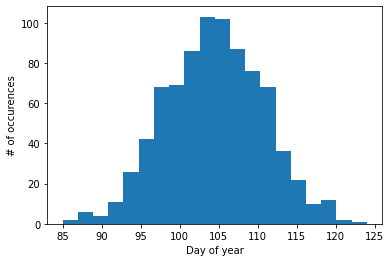

In [16]:
plt.hist(df["Full-flowering date (DOY)"],bins = 20)
plt.xlabel('Day of year')
plt.ylabel('# of occurences')
plt.show()

In [ ]:
This data does appear to be aproximately normally distributed.

**Part B**:Create a line plot where `Year` is the horizontal axis and `FuFD`is the vertical axis.  Do there *visually* appear to be any patterns?

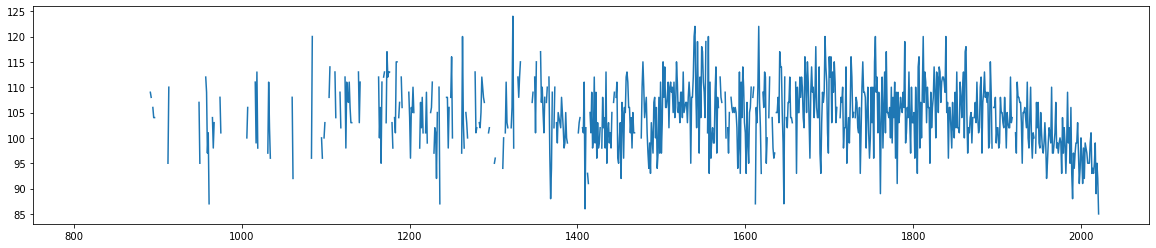

In [30]:
fig,ax = plt.subplots(1,1)
fig.set_figwidth(20)
ax.plot(df["AD"],df["Full-flowering date (DOY)"])

plt.show()

**Solution Markdown:**
It seems like recently the flower has been blooming sooner than in the past

**Part C**: Print out a Tukey five-number summary for the set of full-flowering dates, as well as its mean and standard deviation.

In [56]:
df["Full-flowering date (DOY)"].describe()

count    833.000000
mean     104.453782
std        6.476146
min       85.000000
25%      100.000000
50%      104.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

**Part D**: Suppose we wish to approach the question: is the flowering date becoming *earlier*?

Hypothesis tests give us a clear way to do this!  We can compare e.g. the last $n$ years of data to **all** the years that came before them and ask if they're coming from distributions with the same *means*.

Suppose we take the most recent 12 years of dates, from 2010-2021.  What is the mean full-flowering date for those years?  Perform a hypothesis test at $\alpha=0.01$ testing whether or not the mean from this interval is the same as the mean for the prior **all**-observed years.  If you reject the null hypothesis, output a confidence interval for the different in mean full-flowering dates for the two sets of years.

Write a sentence interpreting your results.

**Note:** there are a lot of missing observations, especially for centuries ago. Make sure you're properly not including these in in $n$ any variance/confidence/etc. calculations.

In [46]:
print(df.loc[df['AD']>2009].describe())
print(df.loc[df['AD']<=2009].describe())

                AD  Full-flowering date (DOY)
count    12.000000                  12.000000
mean   2015.500000                  94.166667
std       3.605551                   4.407294
min    2010.000000                  85.000000
25%    2012.750000                  92.750000
50%    2015.500000                  94.500000
75%    2018.250000                  96.000000
max    2021.000000                 101.000000
                AD  Full-flowering date (DOY)
count  1209.000000                 821.000000
mean   1405.000000                 104.604141
std     349.152545                   6.381408
min     801.000000                  86.000000
25%    1103.000000                 100.000000
50%    1405.000000                 105.000000
75%    1707.000000                 109.000000
max    2009.000000                 124.000000


In [158]:
cleandf=df.loc[df["Full-flowering date (DOY)"]!='NaN']
#Pulling numbers from above
Z = (104.604141-94.166667)/(4.407/np.sqrt(821))
print(Z)
print(stats.norm.ppf(.99))
CiAll = (104.604141+2.32634*(6.381408/np.sqrt(821)),104.604141-2.32634*(6.381408/np.sqrt(821)))
CiTwel = (94.166667+2.32634*(4.407294/np.sqrt(12)),94.166667-2.32634*(4.407294/np.sqrt(12)))
print(CiAll)
print(CiTwel)

67.86157495836369
2.3263478740408408
(105.1222464039156, 104.0860355960844)
(97.12641398870151, 91.2069200112985)


**Solution Markdown:** $H_0:\mu=\mu_0$ Because 67.86 > 2.32 we will reject the null hypothesis. The Ci for all the years is (105.12,104.09), and the Ci for the selected 12 years is (92.12,91.21).

Was the test in part D appropriate to answer a broad question like "does the full flowering data reflect the presence of global warming?"  What tests could we have run instead?

**Solution Markdown:** Not necissarily as the data of a single flower doesn't prove global warming, there could be plently of other variables involved. Maybe testing a bunch of 12 year ranges might be better as then you could atleast conclude that these last 12 years have had the earliest blooming dates of any 12 years 


**Part F**: We should have rejected the null hypothesis in Part D.  But sometimes, people do some shifty things with data.  And we could, too!  One way to be statistically disingenuous is known as $p$-fishing or $p$-hacking.  This process represent the idea of "cherry-picking" through our data to find *subsets* of the data that most support a desired conclusion.

Suppose we - for whatever reason - really wish to use this data set to come to the conclusion that "there is no difference in full flowering datas between now and the past."  To support this conclusion, we devise the following idea:

- Consider *every single* list of 12 consecutive years starting with 1600-1611, then 1601-1612, then 1602-1613.
- For *each* one of those 12-year intervals, generate the 99% confidence interval for the difference in the mean `FuFD`  over  those 12 years' to the mean from most recent 12 years from 2010-2021.

From that list of confidence intervals, print out a list of **every** starting year for an interval that contains zero. (e.g if the confidence interval for comparing 1618-1632 to 2007-2021 contains zero, then print `1618`.)  Report:
- The earliest date of such an interval containing zero.
- The latest date where such an interval **does not** contain zero.

Then write two sentences of how you could interpret those two results to conclude *either* that the flowering dates are getting earlier **or** that they are not getting earlier.

In [197]:
def calcCi(mean,std,n):
    return(mean+2.32*(std/np.sqrt(n)),mean-(std/2.32*np.sqrt(n)))
df16 = df.loc[df["AD"]>=1600]
Ci = []
for x in range(0,420):
    temp = df16[x:x+12]
    Ci.append(calcCi(temp["Full-flowering date (DOY)"].mean(),temp["Full-flowering date (DOY)"].std(),temp["Full-flowering date (DOY)"].count()))
print(Ci)

[(107.87198012319178, 95.09147569264313), (107.87936806883944, 91.07667942025965), (108.74692435130954, 93.18011973968946), (108.26283109311989, 92.93635721403115), (109.49012203871644, 93.7998624429317), (113.04934453309946, 94.90350673844482), (113.23425621346168, 95.13153943693953), (112.93541589780938, 94.54359412565141), (111.86066462090425, 91.68193998791571), (111.86066462090425, 91.68193998791571), (111.99151304964839, 91.7246264684), (111.47930655581197, 91.53309572716265), (111.83535605461991, 91.86069609689139), (112.66059790319613, 97.09164640500465), (112.3083307786682, 94.76787603673162), (112.15932052904193, 94.24230853397479), (112.33727423336583, 93.94014151054209), (109.02085557149928, 94.95750674141779), (109.82443761992087, 94.89347945169278), (110.68172396953851, 95.20259360688706), (111.65336419465619, 98.52963110187842), (110.80627699913353, 98.260246628315), (109.92216090225095, 96.47267156571361), (109.28391352476018, 94.57087719015112), (107.02666666666667, 93

**Solution Markdown:**


<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [10 points] Problem 2: Testing and CI Theories; quick problems


#### 2A (4 pts):
Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


**Solution Markdown:**
The article begins by proposing that currently there is an epidemic of scientists and scientific consumers misusing p values: the given example is that "A P value of .02 (2%) is wrongly considered to mean that the null hypothesis is 2% likely to be true and the alternative is 98% likely to be correct.". The article goes on to suggest a lowering of p value for satistically siginificant results from .05 to .005, and creating a middle ground of statistically "suggestive" for values ranging from .05 to .005. Based on the article it seems like moving the p-value would be a good idea, however the arguments it brings up of increasing biases and selective reporting, as well as the possibility of scientists setting less relevant end points for the sake of decreasing p values are valid. Better options may be the more wholistic evaluations proposed such as focussing on effect sizes and uncertainty as well as adressing biasses would create better scientific reaserch. 


#### 2B (2pts):

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate?   **Justify** your answer in complete English sentences.

**Solution Markdown:** If your alternative hypothesis is that the strength of the carbon is below tolerance, your null hypothesis is most likely that the strength of carbon is at tolerance, thus you would want a lower type 2 error rate. This would mean that you are more likely to judge that the strength of the carbon is below tolerance even if it actually isn't. It might lead to increased production costs but you'd end up with fewer airplanes failing in use. 


#### 2C (4pts):
In an 1881 study Michelson and Newcomb measured the time light took to travel 7.44373 kilometers. Inspecting their study and the descriptions of their 66 measurements, it is reasonable to assume that the data were iid.  Their measurements are below.

Construct an approximate 99\% confidence interval for the time light takes to travel 7400 meters.

Then perform a hypothesis test on whether or not this value significant differs from the approximation that $c=3.0 \cdot 10^8$ meters per second. (Note: The true vale of $c=299792458 \frac{m}{s}$, and your confidence interval can be converted to $\frac{s}{m}$.)

In [3]:
data=[24.828,24.826,24.833,24.824,24.834,24.756,24.827,24.816,24.84,24.798,24.829,24.822,\
      24.824,24.821,24.825,24.83,24.823,24.829,24.831,24.819,24.824,24.82,24.836,24.832,\
      24.836,24.828,24.825,24.821,24.828,24.829,24.837,24.825,24.828,24.826,24.83,24.832,\
      24.836,24.826,24.83,24.822,24.836,24.823,24.827,24.827,24.828,24.827,24.831,24.827,\
      24.826,24.833,24.826,24.832,24.832,24.824,24.839,24.828,24.824,24.825,24.832,24.825,\
      24.829,24.827,24.828,24.829,24.816,24.823]

In [102]:
dataf = pd.DataFrame(data)
desc=dataf.describe().values
Ci = (desc[1][0]+2.32634*(desc[2][0]/np.sqrt(desc[0][0])),desc[1][0]-2.32634*(desc[2][0]/np.sqrt(desc[0][0])))
print(Ci)

(24.8292890735365, 24.82313516888776)


In [150]:
(3.0*(10**8) - (7400/(desc[1][0]*(10**-6))))/((7400/(desc[2][0]*(10**-6)))/np.sqrt(desc[0][0]))

2.2743380821084982e-05

With a null hypothesis of michelson and newcombs sample average being = to that of the currently accepted speed of light, $H_0=\mu=\mu_0$ $2.274e^{-5} < 2.32$ thus we fail to reject the null hypothesis at an alpha of .01   

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [15 points] Problem 3 - The power!


Let $Y$ be the number of heads in 100 tosses of a possibly biased coin, with probability of heads on any toss $p$. Similar to the Belgian Euro example, we hope to *test* whether the coin is biased **toward heads**.

#### Part a)

State the null and alternative hypotheses.


**Solution Markdown:**
The Null hypothesis is that the number of heads is greater than the number of tails. The alternative hypotheses would be that number of heads = number of tails, or that number of tails > number of heads.


#### Part b)
Suppose we define the rejection region to be $Y > 55$. 

Calculate the rate of type I error of this test. (For this, and all remaining parts, calculate probabilities **exactly**, i.e., without using a normal approximation)



#### Part c)

Simulate a single dataset (or appropriate summary of a dataset) under the null hypothesis, and apply your test from part (a). State your conclusion. Is your conclusion in error? If so, which type?

Repeat this process 1000 times in total and verify that the error rate appears consistent with your calculations in part b).



#### Part d)
Consider that the *reality* of a biased coin could take on any number of possible different values of actual bias $p$.  Construct a grid/list of possible values $p$ for the alternative hypothesis $p_{alt}=[0.51,0.52,0.53, \dots .99, 1.00]$.

For each value of $p$ in this list, calculate the power of the test from part $a$.  If possible, return exact values rather than simulated/estimated probabilities.

(Recall: statistical **power** is the probability of rejecting the null hypothesis while the alternative hypothesis is true). 

Plot the power ($y$-axis) against $p$ ($x$-axis) over each of these scenarios. 

Interpret/comment on this plot. Specifically, as $p$ gets *further* from the specified $p=p_0$ under the null hypothesis, what happens to the power?

**Solution Markdown:**


#### Part e)

(e) Suppose we allowed other rejection regions than $Y>55$.  Use the ideas in part (d) to answer the following: how many flips $m$ of a coin are necessary to achieve both $\alpha=0.05$ **and** $\beta=0.05$ for the hypothesis in part (a)?

*Hint*: You can brute force this to find the first value of $n$ that satisfies the requirement.  It's quite a few flips...

**Solution Markdown:**
